# K-Means
- Common clustering technique, helps to solve many problems efficiently.
- K-Means is an example of Hard Clustering, where every point belongs only to one cluster.

## Motivation Problem - *Pizza Parlour Study*

**Problem Statement** Given the list of locations of customers who frequently order Pizza we want to find out optimal locations of Pizza Parlours where they should be opened.

<img src="pizza1.png" alt="Pizza-1" style="width: 400px;"/>

**Step-1** : Initialise Pizza Parlour Centers randomly.
<img src="pizza2.png" alt="Pizza-2" style="width: 400px;"/>

**Step-2** : Assign each customer to its nearest Pizza Center.
<img src="pizza3.png" alt="Pizza-3" style="width: 400px;"/>

**Step-3** : Update the Center Location by taking mean of customers assigned to it.
<img src="pizza4.png" alt="Pizza-4" style="width: 400px;"/>

**Step-4** : Repeat Steps 2 and 3 Until Convergence.
<img src="pizza5.png" alt="Pizza-5" style="width: 400px;"/>

## K-Means Algorithm

**Input Data** : X = {x1,...,xN}

**Goal** : Partition the data among some K number of clusters. Let us assume K is known to us.

Let µk denote the center of Kth Cluster (uk will be vector)(for eg one u having the points 1,2)
if u have m dimesional data than ur point will also be m dimesnional

So we need to ﬁnd an assignment of data points to clusters,
as well as a set of cluster centers{µk}, such that the sum of the squares 
of the distances of each data point to its closest cluster center µk, is a minimum. 




<img src="k-means.png" alt="Pizza-1" style="width: 600px;"/>


## Implementation



In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

## Dataset Preparation

In [18]:
X,y  = make_blobs?

In [3]:
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

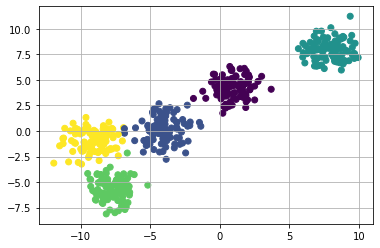

In [4]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()
#WE have to identify these clusters and only allowed to use the x values not y bcoz this is unsupervised learning

In [5]:
k = 5

color  = ["green","red","blue","yellow","orange"]

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []#all the points closest to them 
    
    cluster = {
        'center':center,
        'points':points,
        'color': color[i]
        }
    
    clusters[i] = cluster




In [6]:
# center = 10*(np.random.random((X.shape[1],)))
# print(center)

In [7]:
print(type(clusters))

<class 'dict'>


In [8]:
clusters

{0: {'center': array([9.55355996, 7.71869427]),
  'points': [],
  'color': 'green'},
 1: {'center': array([8.23194169, 1.76494872]), 'points': [], 'color': 'red'},
 2: {'center': array([ 7.47060479, -0.14666649]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-0.04728002, -8.14101202]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-9.45701166, -0.24462704]),
  'points': [],
  'color': 'orange'}}

In [10]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [25]:
# Assign every data point to one of the clusters
#Expectization maximisation algorithm k means is the special case of this algo where this step is called e step
def assignPointToClusters(clusters): #E-Step
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] #Clear the list bcoz we have to repeat the step the steps again to get the nearest points
                    
    

def plotClusters(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        print(pts.shape)
        
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")
   
    

(100, 2)
(82, 2)
(45, 2)
(103, 2)
(170, 2)


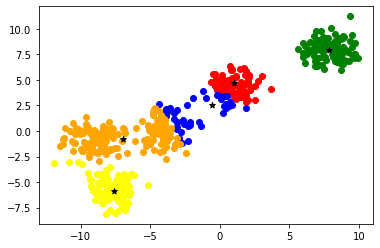

In [24]:
assignPointToClusters(clusters)
plotClusters(clusters)

(100, 2)
(94, 2)
(67, 2)
(104, 2)
(135, 2)


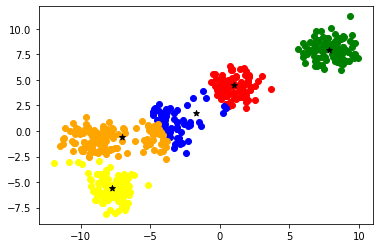

In [27]:
# Repeat this cell few times or put it inside a loop
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

(100, 2)
(99, 2)
(93, 2)
(100, 2)
(108, 2)


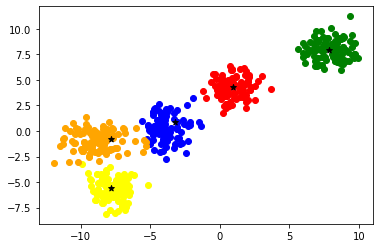

In [28]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

(100, 2)
(100, 2)
(98, 2)
(99, 2)
(103, 2)


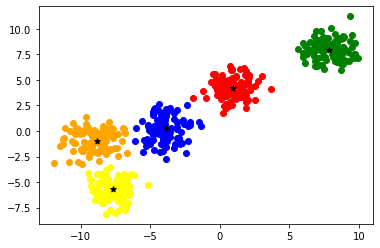

In [29]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

(100, 2)
(100, 2)
(98, 2)
(99, 2)
(103, 2)


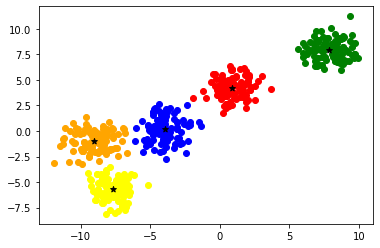

In [30]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

(100, 2)
(100, 2)
(98, 2)
(99, 2)
(103, 2)


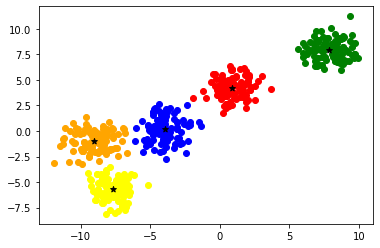

In [31]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

##  Now after repeating this e step and m step several times clustering is almost done
k means can stuck in local minima in case of random inetialsiation and can give diff types of result for diff types of 
inetialisation

### K-Means++

- K-Means is quite sensitive to initalization, if the init is not good, our algorithm is not able to make desired number
of clusters.
- To overcome this problem, we use technique called K-Means++ (described in paper [Robust Seed Selection for K-Means type of Algorithms](https://arxiv.org/abs/1202.1585))
    which chooses initial centers so that they are statiscallly close to final ones.

- The method is default choice for sklearn, so we will use it directly without going into much maths!

Two different types of clustering oberserved for two different types of initialisations as discussed in the last example.

**Clustering - 1** 
<img src="init_2.png" alt="Pizza-1" style="width: 400px;"/>

**Clustering - 2**
<img src="init_1.png" alt="Pizza-1" style="width: 400px;"/>

## Using Sci-kit Learn

In [38]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [39]:
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [41]:
from sklearn.cluster import KMeans

In [42]:

kmeans  = KMeans(n_clusters=5)

In [45]:
kmeans.fit(X,y)#Training part is done

KMeans(n_clusters=5)

In [46]:
centers = kmeans.cluster_centers_

In [48]:
centers

array([[-9.0671623 , -0.96740759],
       [ 7.8649674 ,  7.97988109],
       [ 0.88641907,  4.19441853],
       [-7.6726196 , -5.69211059],
       [-3.97953526,  0.19458336]])

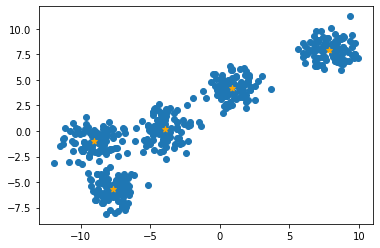

In [49]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1],marker='*',color='orange')
plt.show()

In [50]:
pred = kmeans.labels_

In [51]:
print(pred)

[3 1 4 3 3 4 0 3 1 3 1 4 1 3 4 3 1 3 3 1 2 2 3 4 3 2 0 0 4 0 3 0 2 2 3 2 1
 1 3 2 2 2 0 0 4 1 1 0 0 0 1 3 0 3 3 2 3 3 1 4 1 4 4 3 0 1 4 4 2 4 2 3 2 3
 2 4 3 0 2 2 4 2 4 0 1 0 4 1 0 4 0 2 3 2 2 1 3 4 4 2 1 2 4 4 1 1 1 4 4 3 1
 0 3 1 4 2 1 0 2 4 1 4 0 3 2 0 0 0 3 3 4 4 3 1 1 0 4 0 4 3 3 2 4 1 0 3 1 1
 3 4 3 3 4 4 1 2 2 0 4 3 2 1 0 2 1 2 1 2 2 2 0 3 2 1 2 0 3 4 1 0 1 3 1 2 0
 0 2 3 4 1 2 4 0 3 0 2 4 0 3 3 3 2 2 1 3 0 0 3 1 3 3 3 2 1 4 1 3 3 1 0 4 0
 0 2 3 4 3 4 0 2 4 4 3 2 3 2 4 1 4 2 2 1 3 3 4 4 2 1 2 3 0 1 0 3 0 0 0 0 1
 2 1 3 2 1 0 4 1 1 1 0 3 3 4 2 2 1 4 4 3 4 0 4 1 1 0 0 2 0 0 1 2 3 4 2 4 0
 4 4 1 3 2 1 2 2 3 0 2 4 2 0 3 3 4 1 2 0 1 2 4 0 1 0 3 2 0 4 4 2 2 2 3 0 2
 3 1 4 4 0 1 1 4 4 0 2 2 2 3 0 1 0 3 2 1 1 4 2 2 0 2 0 4 4 4 0 2 3 2 4 0 0
 1 3 1 0 3 0 4 1 2 1 4 3 3 1 1 2 1 2 0 4 1 0 3 3 1 4 2 0 3 3 3 0 1 2 1 1 1
 0 2 4 1 4 4 0 4 3 4 3 1 2 2 3 1 0 3 2 4 1 0 4 0 0 1 0 4 0 1 0 4 0 3 2 2 0
 2 1 2 2 0 3 3 4 0 2 4 0 4 1 4 1 3 2 4 3 4 3 3 2 3 2 0 1 1 4 3 3 0 0 1 0 0
 1 0 1 1 1 0 2 0 4 1 4 4 

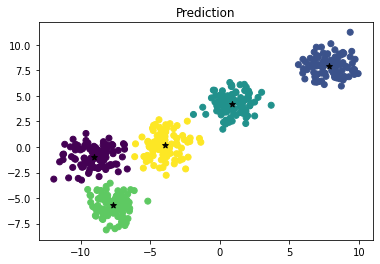

In [52]:
plt.scatter(X[:,0],X[:,1],c=pred)
plt.scatter(centers[:,0],centers[:,1],marker='*',color='black')
plt.title("Prediction")
plt.show()

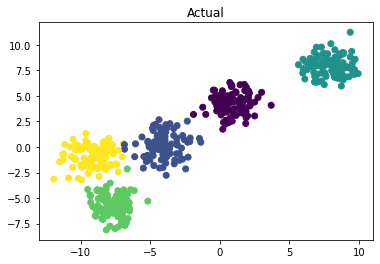

In [53]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Actual")
plt.show()

## Problem with K-Means
- Can fail sometimes on complex datasets

In [54]:
import matplotlib.pyplot as plt

In [55]:
from sklearn.datasets import make_circles,make_moons

In [61]:
X,Y = make_moons(n_samples=200,noise=0.10)

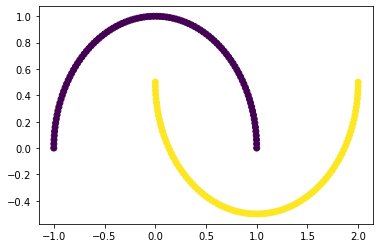

In [62]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

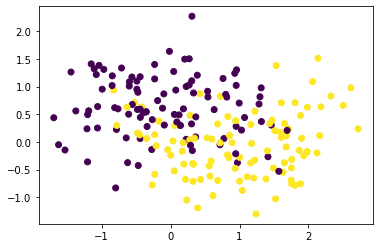

In [72]:
X,Y = make_moons(n_samples=200,noise=0.50)#noise increase dist bw point increase
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [73]:
X,Y = make_moons(n_samples=200,noise=0.10)#noise increase dist bw point increase

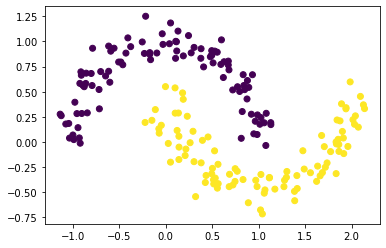

In [71]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [58]:
from sklearn.cluster import KMeans

In [74]:
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(n_clusters=2)

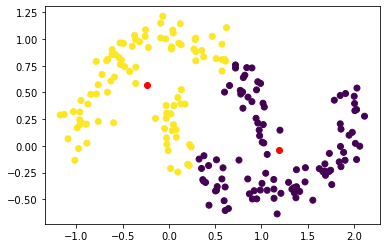

In [75]:
centers = km.cluster_centers_
label = km.labels_

plt.scatter(X[:,0],X[:,1],c=label)
plt.scatter(centers[:,0],centers[:,1],color='red')
plt.show()

# DBSCAN
- **Density Based Spatial Clustering of Applications with Noise**
- Based upon on the idea, that a cluster is a high density area surrounded by low density region
- Starts by exploring a small area, if density is "good enough" it considered as part of cluster, and explores neigbours and so on, so it groups regions based upon density!

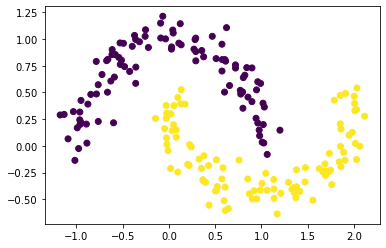

In [77]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [87]:
from sklearn.cluster import DBSCAN



In [88]:
dbs = DBSCAN

In [93]:
dbs = DBSCAN(eps=0.2,min_samples=5)

In [94]:
dbs.fit(X)#Trainig is also complete

DBSCAN(eps=0.2)

In [95]:
Ypred = dbs.fit_predict(X)

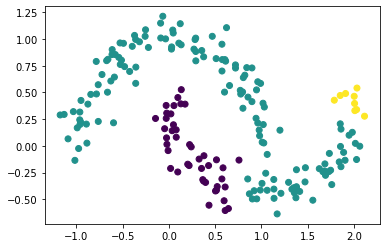

In [96]:
plt.scatter(X[:,0],X[:,1],c=Ypred)
plt.show()

In [97]:
dbs = DBSCAN(eps=0.5,min_samples=5)

In [98]:
dbs.fit(X)#Trainig is also complete

DBSCAN()

In [99]:
Ypred = dbs.fit_predict(X)

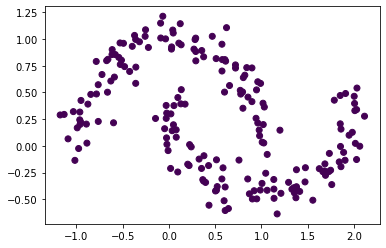

In [100]:
plt.scatter(X[:,0],X[:,1],c=Ypred)
plt.show()